In [2]:
from datascience import *
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plots

In [4]:
table = Table.read_table("united_summer2015.csv")
table

Date,Flight Number,Destination,Delay
6/1/15,73,HNL,257
6/1/15,217,EWR,28
6/1/15,237,STL,-3
6/1/15,250,SAN,0
6/1/15,267,PHL,64
6/1/15,273,SEA,-6
6/1/15,278,SEA,-8
6/1/15,292,EWR,12
6/1/15,300,HNL,20
6/1/15,317,IND,-10


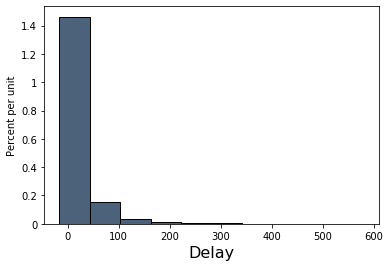

In [6]:
table.hist("Delay")

In [7]:
np.mean(table.column("Delay"))

16.658155515370705

In [8]:
np.std(table.column("Delay"))

39.480199851609314

In [9]:
sample = table.sample(k=400, with_replacement=True)
sample

Date,Flight Number,Destination,Delay
8/19/15,719,IAD,60
6/1/15,1405,LAS,-1
6/28/15,489,ORD,4
8/2/15,526,DEN,-5
8/8/15,1900,PHL,23
6/18/15,760,JFK,22
8/21/15,1735,PDX,1
7/29/15,1916,DEN,3
8/5/15,887,LAX,2
8/11/15,1975,FLL,58


In [12]:
np.mean(sample.column("Delay"))

17.6775

In [14]:
np.std(sample.column("Delay"))

36.76674439966095

In [32]:
def simulate(x):
    meanArray = make_array()
    for i in np.arange(x):
        s = table.sample(k=400, with_replacement=True)
        sMean = np.mean(s.column("Delay"))
        meanArray = np.append(meanArray, sMean)
    return meanArray
x = simulate(10000)
x

array([21.91  , 20.89  , 16.4075, ..., 16.0275, 15.03  , 15.765 ])

Mean Differences: 0.008284734629295798
Std of the sample mean: 1.969754546270915


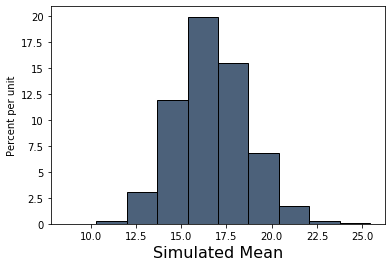

In [48]:
# Simulate for 10000 times
print("Mean Differences: " + str(abs(np.mean(x)- np.mean(table.column("Delay")))))
print("Std of the sample mean: " + str(np.std(x)))
Table().with_column('Simulated Mean', x).hist()

Mean Differences: 0.10028051537070581
Std of the sample mean: 1.7238354175718167


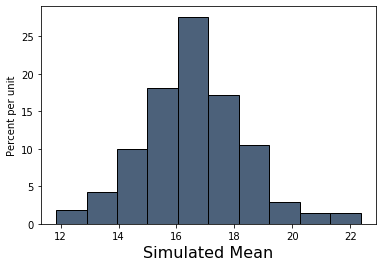

In [47]:
# Repeat for 200 times:
y = simulate(200)
print("Mean Differences: " + str(abs(np.mean(y)- np.mean(table.column("Delay")))))
print("Std of the sample mean: " + str(np.std(y)))
Table().with_column('Simulated Mean', y).hist()

Mean Differences: 0.08733448462929161
Std of the sample mean: 2.049517540154268


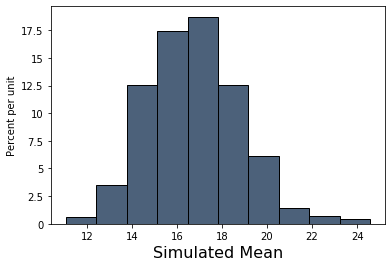

In [43]:
# Repeat for 1000 times:
z = simulate(1000)
print("Mean Differences: " + str(abs(np.mean(z)- np.mean(table.column("Delay")))))
print("Std of the sample mean: " + str(np.std(z)))
Table().with_column('Simulated Mean', z).hist()

In [ ]:
# How does the histogram change?  How do the standard deviations of the sample means change?